In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from collections import Counter 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import math
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Direccion al dataset de churn

url = 'https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt'

In [75]:
df = pd.read_csv(url, delimiter = ',')

In [76]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


No se observan nulos. 


In [78]:
# Analizo variable categorica

df["Int'l Plan"].value_counts()

no     3010
yes     323
Name: Int'l Plan, dtype: int64

In [79]:
# Analizo variable categorica

df["VMail Plan"].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

In [80]:
# Cantidad de variables objeto

len(df['State'].unique())

51

In [81]:
# Convierto las variables categoricas 'si' y 'no' en variables numericas booleanas para simplificar el modelo a futuro

df["Int'l Plan"] = df["Int'l Plan"].map(dict(yes=1, no=0))
df["VMail Plan"] = df["VMail Plan"].map(dict(yes=1, no=0))

In [82]:
# Hay columnas innecesarias para el modelo como el telfono (*Phone*) que podemos quitar

df_2 = df.drop(columns = ['Phone'], axis = 1)

In [83]:
df_2['Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [84]:
# Convierto los estados en un codigo para poder graficarlo

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_2['State'] = le.fit_transform(df_2['State'])

In [85]:
columnas = list(df_2.columns)
columnas = columnas[:19] # Saco la target

In [86]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=10, cols=2
                    ,subplot_titles=(columnas))


    
# Add histogram data
x1 = df_2[df_2['Churn?'] == 'False.'][columnas[0]]
x2 = df_2[df_2['Churn?'] == 'True.'][columnas[0]]

fig.add_trace(go.Histogram(x=x1), row = 1, col = 1)
fig.add_trace(go.Histogram(x=x2), row = 1, col = 1)
fig.update_layout(barmode='overlay')

x3 = df_2[df_2['Churn?'] == 'False.'][columnas[1]]
x4 = df_2[df_2['Churn?'] == 'True.'][columnas[1]]

fig.add_trace(go.Histogram(x=x3), row = 1, col = 2)
fig.add_trace(go.Histogram(x=x4), row = 1, col = 2)
fig.update_layout(barmode='overlay')

x5 = df_2[df_2['Churn?'] == 'False.'][columnas[2]]
x6 = df_2[df_2['Churn?'] == 'True.'][columnas[2]]

fig.add_trace(go.Histogram(x=x5), row = 2, col = 1)
fig.add_trace(go.Histogram(x=x6), row = 2, col = 1)
fig.update_layout(barmode='overlay')

x7 = df_2[df_2['Churn?'] == 'False.'][columnas[3]]
x8 = df_2[df_2['Churn?'] == 'True.'][columnas[3]]

fig.add_trace(go.Histogram(x=x7), row = 2, col = 2)
fig.add_trace(go.Histogram(x=x8), row = 2, col = 2)
fig.update_layout(barmode='overlay')

x9 = df_2[df_2['Churn?'] == 'False.'][columnas[4]]
x10 = df_2[df_2['Churn?'] == 'True.'][columnas[4]]

fig.add_trace(go.Histogram(x=x9), row = 3, col = 1)
fig.add_trace(go.Histogram(x=x10), row = 3, col = 1)
fig.update_layout(barmode='overlay')

x11 = df_2[df_2['Churn?'] == 'False.'][columnas[5]]
x12 = df_2[df_2['Churn?'] == 'True.'][columnas[5]]

fig.add_trace(go.Histogram(x=x11), row = 3, col = 2)
fig.add_trace(go.Histogram(x=x12), row = 3, col = 2)
fig.update_layout(barmode='overlay')

x13 = df_2[df_2['Churn?'] == 'False.'][columnas[6]]
x14 = df_2[df_2['Churn?'] == 'True.'][columnas[6]]

fig.add_trace(go.Histogram(x=x13), row = 4, col = 1)
fig.add_trace(go.Histogram(x=x14), row = 4, col = 1)
fig.update_layout(barmode='overlay')

x15 = df_2[df_2['Churn?'] == 'False.'][columnas[7]]
x16 = df_2[df_2['Churn?'] == 'True.'][columnas[7]]

fig.add_trace(go.Histogram(x=x13), row = 4, col = 2)
fig.add_trace(go.Histogram(x=x14), row = 4, col = 2)
fig.update_layout(barmode='overlay')

x17 = df_2[df_2['Churn?'] == 'False.'][columnas[8]]
x18 = df_2[df_2['Churn?'] == 'True.'][columnas[8]]

fig.add_trace(go.Histogram(x=x17), row = 5, col = 1)
fig.add_trace(go.Histogram(x=x18), row = 5, col = 1)
fig.update_layout(barmode='overlay')

x19 = df_2[df_2['Churn?'] == 'False.'][columnas[9]]
x20 = df_2[df_2['Churn?'] == 'True.'][columnas[9]]

fig.add_trace(go.Histogram(x=x19), row = 5, col = 2)
fig.add_trace(go.Histogram(x=x20), row = 5, col = 2)
fig.update_layout(barmode='overlay')

x21 = df_2[df_2['Churn?'] == 'False.'][columnas[10]]
x22 = df_2[df_2['Churn?'] == 'True.'][columnas[10]]

fig.add_trace(go.Histogram(x=x21), row = 6, col = 1)
fig.add_trace(go.Histogram(x=x22), row = 6, col = 1)
fig.update_layout(barmode='overlay')

x23 = df_2[df_2['Churn?'] == 'False.'][columnas[11]]
x24 = df_2[df_2['Churn?'] == 'True.'][columnas[11]]

fig.add_trace(go.Histogram(x=x23), row = 6, col = 2)
fig.add_trace(go.Histogram(x=x24), row = 6, col = 2)
fig.update_layout(barmode='overlay')

x25 = df_2[df_2['Churn?'] == 'False.'][columnas[12]]
x26 = df_2[df_2['Churn?'] == 'True.'][columnas[12]]

fig.add_trace(go.Histogram(x=x25), row = 7, col = 1)
fig.add_trace(go.Histogram(x=x26), row = 7, col = 1)
fig.update_layout(barmode='overlay')

x27 = df_2[df_2['Churn?'] == 'False.'][columnas[13]]
x28 = df_2[df_2['Churn?'] == 'True.'][columnas[13]]

fig.add_trace(go.Histogram(x=x27), row = 7, col = 2)
fig.add_trace(go.Histogram(x=x28), row = 7, col = 2)
fig.update_layout(barmode='overlay')

x29 = df_2[df_2['Churn?'] == 'False.'][columnas[14]]
x30 = df_2[df_2['Churn?'] == 'True.'][columnas[14]]

fig.add_trace(go.Histogram(x=x29), row = 8, col = 1)
fig.add_trace(go.Histogram(x=x30), row = 8, col = 1)
fig.update_layout(barmode='overlay')

x31 = df_2[df_2['Churn?'] == 'False.'][columnas[15]]
x32 = df_2[df_2['Churn?'] == 'True.'][columnas[15]]

fig.add_trace(go.Histogram(x=x31), row = 8, col = 2)
fig.add_trace(go.Histogram(x=x32), row = 8, col = 2)
fig.update_layout(barmode='overlay')

x33 = df_2[df_2['Churn?'] == 'False.'][columnas[16]]
x34 = df_2[df_2['Churn?'] == 'True.'][columnas[16]]

fig.add_trace(go.Histogram(x=x33), row = 9, col = 1)
fig.add_trace(go.Histogram(x=x34), row = 9, col = 1)
fig.update_layout(barmode='overlay')

x35 = df_2[df_2['Churn?'] == 'False.'][columnas[17]]
x36 = df_2[df_2['Churn?'] == 'True.'][columnas[17]]

fig.add_trace(go.Histogram(x=x35), row = 9, col = 2)
fig.add_trace(go.Histogram(x=x36), row = 9, col = 2)
fig.update_layout(barmode='overlay')

x37 = df_2[df_2['Churn?'] == 'False.'][columnas[18]]
x38 = df_2[df_2['Churn?'] == 'True.'][columnas[18]]

fig.add_trace(go.Histogram(x=x37), row = 10, col = 1)
fig.add_trace(go.Histogram(x=x38), row = 10, col = 1)
fig.update_layout(barmode='overlay')


# Create distplot with custom bin_size
fig.update_layout(height=2000, width=1000)
fig.update_layout(showlegend = False, title_text = 'Cada Variable segun target')
fig.show()

In [87]:
# Reviso numeros duplicados

len(df.Phone.unique())

3333

In [88]:
# Miro donde estan los clientes con churn (positivo o negativo) a ver si hay algún estado donde hay mayor concentracion

fig = px.bar(df.loc[df['Churn?'] == 'False.'].groupby('State', as_index = False).agg({'Phone':'count'}).sort_values(by = 'Phone', ascending = False)
             , x='State', y='Phone', color = 'Phone')
fig.update_layout(title_text = 'Clientes que no se dieron de baja por estado')
fig.show()
#df.loc[df['Churn?'] == 'False.'].groupby('State', as_index = False).agg({'Phone':'count'})

In [89]:
# Miro donde estan los clientes con churn (positivo o negativo) a ver si hay algún estado donde hay mayor concentracion

fig = px.bar(df.loc[df['Churn?'] == 'True.'].groupby('State', as_index = False).agg({'Phone':'count'}).sort_values(by = 'Phone', ascending = False)
             , x='State', y='Phone', color = 'Phone')
fig.update_layout(title_text = 'Clientes que  se dieron de baja por estado')
fig.show()
#df.loc[df['Churn?'] == 'False.'].groupby('State', as_index = False).agg({'Phone':'count'})

In [90]:
fig = px.scatter_3d(df, x="Night Calls", y="Night Mins", z = 'Night Charge', color="Churn?")
fig.update_layout(title_text = 'Night Relations')
fig.show()

In [91]:
fig = px.scatter_3d(df, x="Day Calls", y="Day Mins", z = 'Day Charge', color="Churn?")
fig.update_layout(title_text = 'Day Relations')
fig.show()

In [92]:
fig = px.scatter_3d(df, x="Eve Calls", y="Eve Mins", z = 'Eve Charge', color="Churn?")
fig.update_layout(title_text = 'Eve Relations')
fig.show()

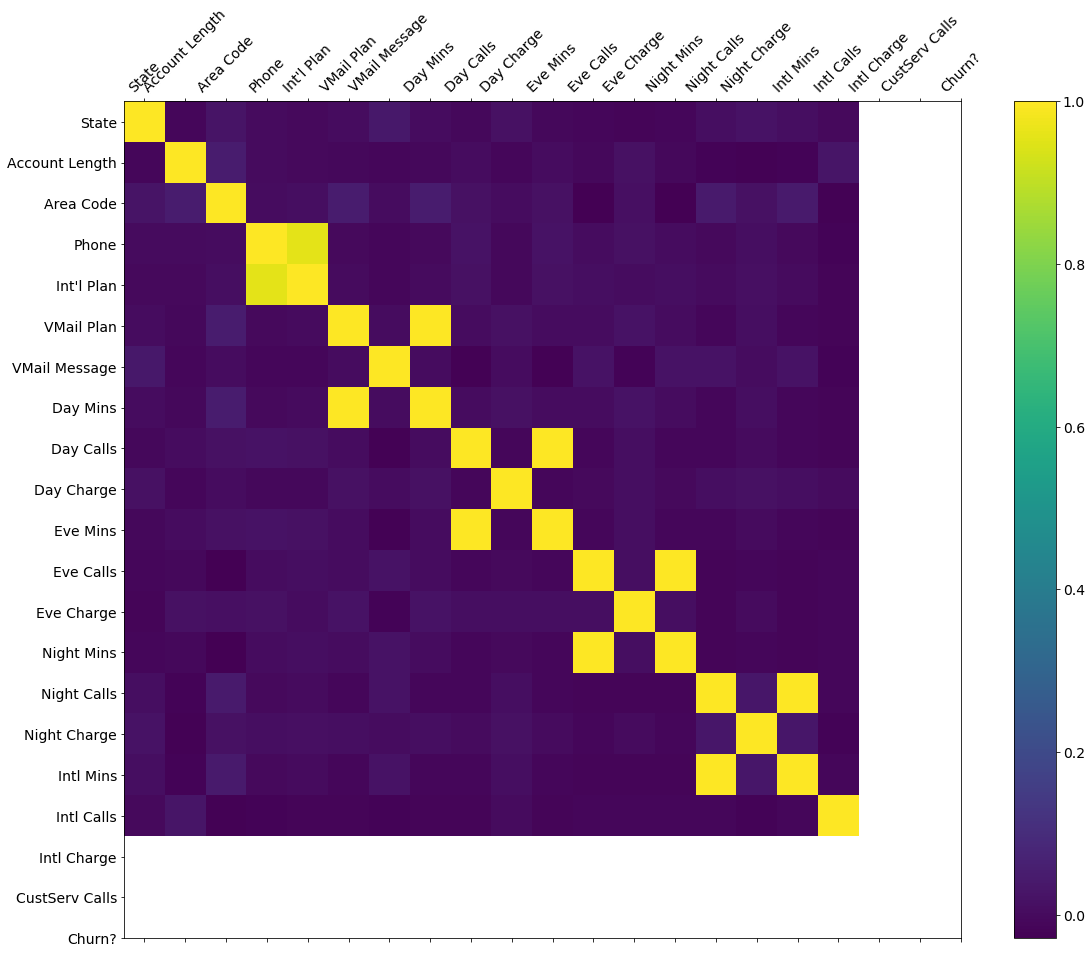

In [93]:
# Matriz de correlación

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

No hay ninguna variable que me permita separar entre un churn positivo y uno negativo

## Aplico BORUTA

In [94]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

df_2['Churn?']         = df_2['Churn?'].replace('False.',0)
df_2['Churn?']         = df_2['Churn?'].replace('True.',1)

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = df_2.drop(columns=['Churn?'], axis = 1).values
y = df_2['Churn?'].values

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	6


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	6


In [95]:
feat_cols = df_2.drop(columns=['Churn?'], axis = 1).columns[feat_selector.support_]

filtered_df = pd.DataFrame(X_filtered,columns = feat_cols)
filtered_df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Charge,Eve Mins,Eve Charge,Night Mins,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,0.0,1.0,25.0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3.0,2.70,1.0
1,0.0,1.0,26.0,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.0,3.70,1.0
2,0.0,0.0,0.0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5.0,3.29,0.0
3,1.0,0.0,0.0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7.0,1.78,2.0
4,1.0,0.0,0.0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3.0,2.73,3.0


## Visualizo el dataset aplicando PCA

In [96]:
x = filtered_df
x = StandardScaler().fit_transform(x) # normalizing the features

In [97]:
x.shape

(3333, 13)

In [98]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

normalized_df = pd.DataFrame(x,columns = feat_cols)
normalized_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,-0.327580,1.617086,1.234883,1.566767,1.567036,-0.070610,-0.070427,0.866743,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,-0.327580,1.617086,1.307948,-0.333738,-0.334013,-0.108080,-0.107549,1.058571,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,-0.327580,-0.618396,-0.591760,1.168304,1.168464,-1.573383,-1.573900,-0.756869,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,3.052685,-0.618396,-0.591760,2.196596,2.196759,-2.742865,-2.743268,-0.078551,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,3.052685,-0.618396,-0.591760,-0.240090,-0.240041,-1.038932,-1.037939,-0.276311,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


In [99]:
# Aplico PCA

pca_df = PCA(n_components=5) # 2 componentes para poder graficarlo en 2-d
principalComponents_df = pca_df.fit_transform(x)

# Creo un dataframe con los dos componentes principales

principal_DF = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4',
                         'principal component 5'])

principal_DF.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,1.959440,-0.174642,-0.989962,-2.061264,1.159435
1,-0.398070,-0.218835,0.996929,-2.902655,0.385549
2,-1.418144,-0.570461,-2.697396,0.143637,0.865985
3,0.646049,-2.591684,-3.917838,1.080054,2.274687
4,-1.111565,-0.818373,-0.654415,0.756502,0.330275


In [100]:
print('Variacion explicada por cada componentet: {}'.format(pca_df.explained_variance_ratio_))

Variacion explicada por cada componentet: [0.15748863 0.15661942 0.15348997 0.15202938 0.147528  ]


### Visualizo

In [101]:
principal_DF['target'] = df_2['Churn?']

In [102]:
# fig = px.scatter_3d(principal_DF, x='principal component 1', y='principal component 2',z = 'principal component 3',color='target')
# fig.show()

## Reviso balanceo de la clase

In [103]:
df_2['Churn?'].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [104]:
print('El churn negativo representa el %'
      , round((df_2['Churn?'].value_counts()[0])/sum(df_2['Churn?'].value_counts())*100,2),'de los datos')

print('El churn positivo representa el %'
      , round((df_2['Churn?'].value_counts()[1])/sum(df_2['Churn?'].value_counts())*100,2),'de los datos')

El churn negativo representa el % 85.51 de los datos
El churn positivo representa el % 14.49 de los datos


## Balanceo con TomekLinks

In [105]:
X = principal_DF[['principal component 1','principal component 2','principal component 3','principal component 4',
                 'principal component 5']]
y = principal_DF['target']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
tl = TomekLinks(return_indices=True, ratio = 'majority')

X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

Counter(y_tl)

Counter({0: 1799, 1: 323})

In [108]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)
Counter(y_smt)

Counter({0: 1855, 1: 1855})

***

## Aplico Distribución Gaussiana Multivariable

#### Primero con el dataset original 

In [109]:
# Paso el dataframe así como esta
def estimateGaussian(X):
    n = np.size(X, 1)            # Nro de columnas
    m = np.size(X, 0)            # Nro de filas
    mu = np.zeros((n, 1))        # Media de todos los features
    sigma2 = np.zeros((n, 1))    # Matriz de covarianza

    mu = np.reshape(np.array((1/m)*np.sum(X, 0)),(1,n))
    sigma2 = np.reshape(np.array((1/m)*np.sum(np.power((X - mu),2), 0)),(1,n))
    
    return mu,sigma2

In [110]:
mu, sigma2 = estimateGaussian(df_2.iloc[:,:-1])

In [111]:
# Calculo prob

def multivariateGaussian(X, mu, sigma2):
    n = np.size(sigma2, 1)
    m = np.size(sigma2, 0)
    #print(m,n)

    if n == 1 or m == 1:
        # print('Yes!')
        sigma2 = np.diag(sigma2[0, :])
    #print(sigma2)
    X = X - mu
    pi = math.pi
    det = np.linalg.det(sigma2)
    inv = np.linalg.inv(sigma2)
    val = np.reshape(np.array((-0.5)*np.sum(np.multiply((X@inv),X), 1)),(np.size(X, 0), 1))
    #print(val.shape)
    p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)

    return p

In [112]:
p = multivariateGaussian(df_2.iloc[:,:-1], mu, sigma2)

In [113]:
df_2['proba'] = p

fig = go.Figure()
fig.add_trace(go.Histogram(x = df_2.loc[df_2['Churn?'] == 0]['proba']))
fig.add_trace(go.Histogram(x = df_2.loc[df_2['Churn?'] == 1]['proba']))

# Overlay both histograms
fig.update_layout(barmode = 'overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity = 0.75)
fig.show()

### Pruebo con los PCs

In [115]:
mu, sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)

In [118]:
X['proba'] = p
X['target'] = y

In [119]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = X.loc[X['target'] == 0]['proba']))
fig.add_trace(go.Histogram(x = X.loc[X['target'] == 1]['proba']))

# Overlay both histograms
fig.update_layout(barmode = 'overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity = 0.75)
fig.show()